### Bump test at NCSA
* performed on 1/23/21 (hold each force for 5s; telemetry was at 1Hz)

In [1]:
#from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

<Figure size 432x288 with 0 Axes>

In [2]:
summit = 1 #use this for summit testing
#summit = 0 #use this for NCSA

In [3]:
if summit:
    client = EfdClient('summit_efd')
else:
    client = EfdClient('ncsa_teststand_efd')
csc_index = 1

In [5]:
if summit:
    start = Time('2022-05-11T15:49:00') #this is UTC
else:
    start = Time('2022-05-11T15:49:00') #this is UTC
    
end = start+timedelta(minutes=22)

In [8]:
df = await client.select_time_series('lsst.sal.MTM2.axialForce', '*', 
                                     start.utc, 
                                     end.utc, 
                                     csc_index)

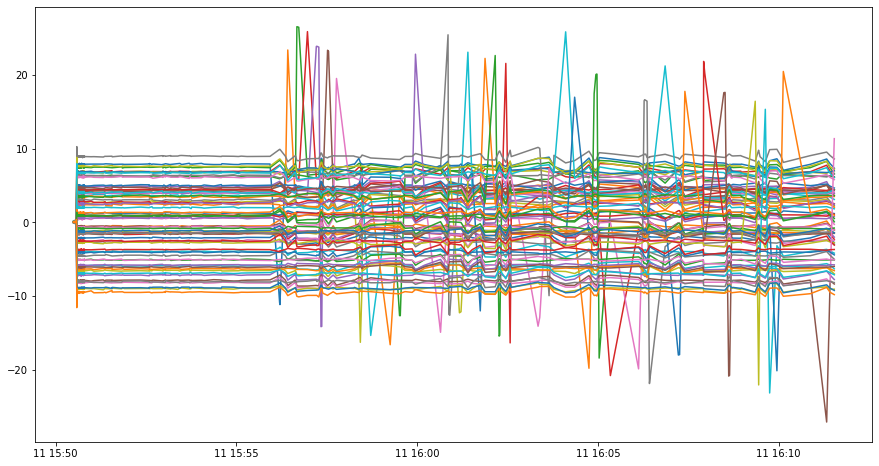

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(72):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['measured%d'%i]-df['measured%d'%i][0])

In [10]:
len(df)

261

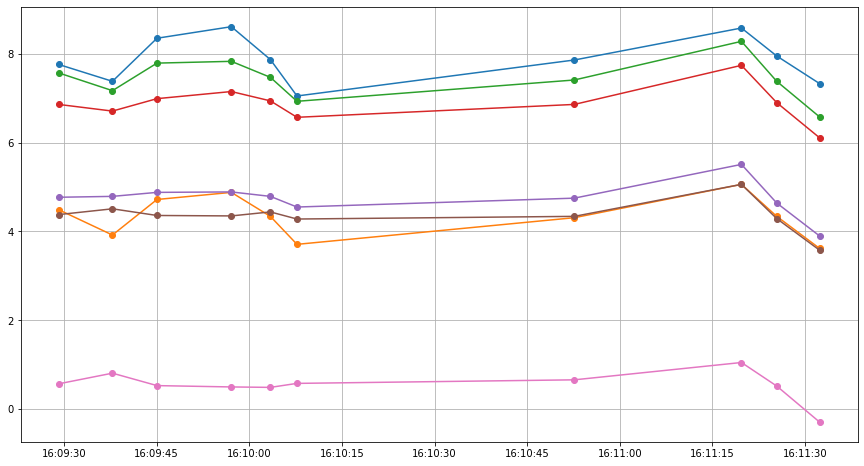

In [11]:
startIdx = np.argmax(np.array(df['measured0'] -df['measured0'][0])>10) - 10
fig, ax = plt.subplots(figsize=(15,8))
for i in range(7):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+600], unit='s'), 
             df['measured%d'%i][startIdx:startIdx+600]-df['measured%d'%i][0],'-o')
plt.grid()

In [12]:
dft = await client.select_time_series('lsst.sal.MTM2.tangentForce', '*', 
                                     start.utc, 
                                     end.utc, 
                                      csc_index)

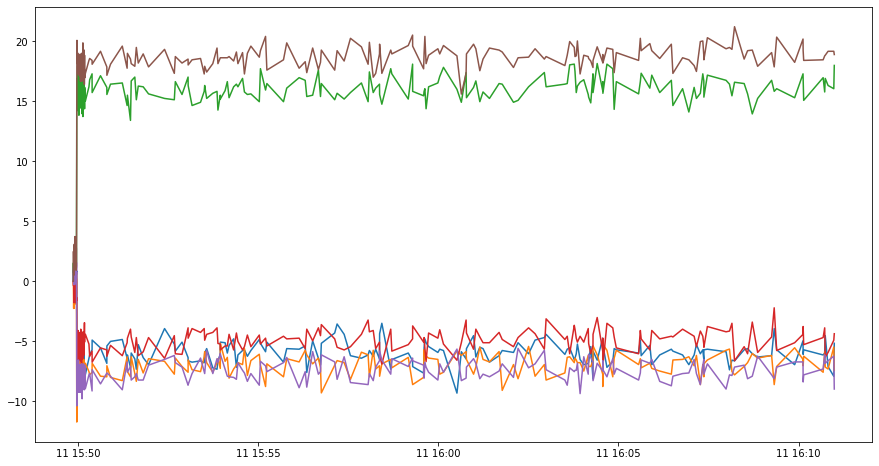

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    plt.plot(dft['measured%d'%i]-dft['measured%d'%i][0])

In [14]:
i = 0
aa = np.array(dft['measured%d'%(i)]-dft['measured%d'%(i)][0])
nn = len(aa)
aa[:round(nn/2)] = 0
startIdx = np.argmax(aa>10) - 10

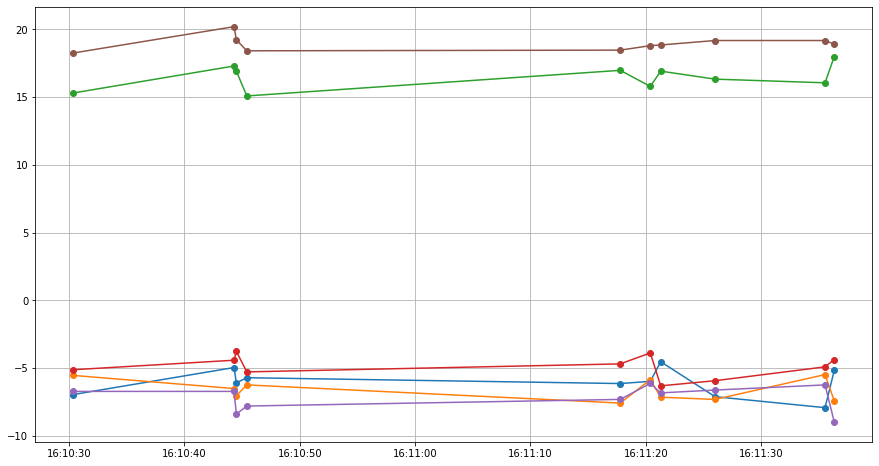

In [15]:
rr = 600
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(6):
    plt.plot(pd.to_datetime(dft.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             dft['measured%d'%(i)][startIdx:startIdx+rr]-dft['measured%d'%(i)][0],'-o')
plt.grid()
aa = np.array(dft['measured%d'%(i)][startIdx:startIdx+rr]-dft['measured%d'%(i)][0])